# Importing important libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/2 heart_disease_dataset.csv')

In [ ]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  num       303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')


There are thirteen features in Dataset

age: The person's age in years

sex: The person's sex (1 = male, 0 = female)

cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)

trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)

chol: The person's cholesterol measurement in mg/dl

fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

thalach: The person's maximum heart rate achieved

exang: Exercise induced angina (1 = yes; 0 = no)

oldpeak: ST depression induced by exercise relative to rest

slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

ca: The number of major vessels (0-3)

thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

num: Heart disease (0 = no, 1 = yes)


In [ ]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,-1319.468647,-655.363036,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,11432.566205,8111.366638,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,-100000.000000,-100000.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


# Exploratory data analysis

Missing values

In [ ]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

Categorical features

In [ ]:
categorical_features = []
for features in data.columns:
  if len(data[features].unique()) < 10:
    categorical_features.append(features)

categorical_features

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'num']

Continous features

In [ ]:
continous_features = []
for features in data.columns:
  if features not in categorical_features:
    continous_features.append(features)

continous_features

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

There are no missing values in any column of the dataset.

Outlier detection in continous features

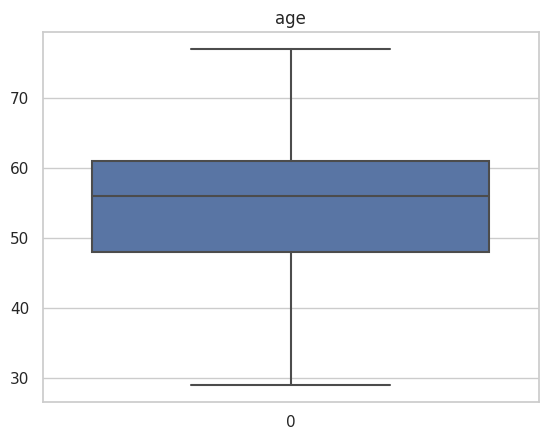

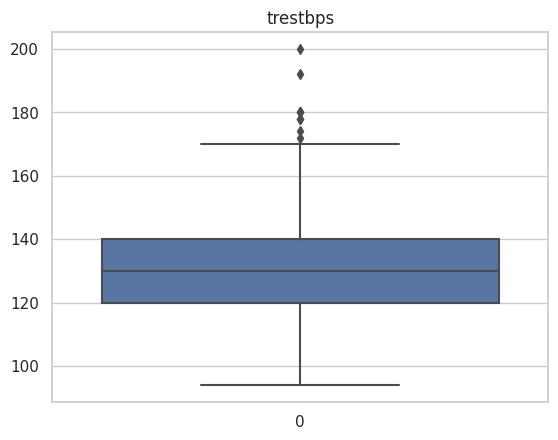

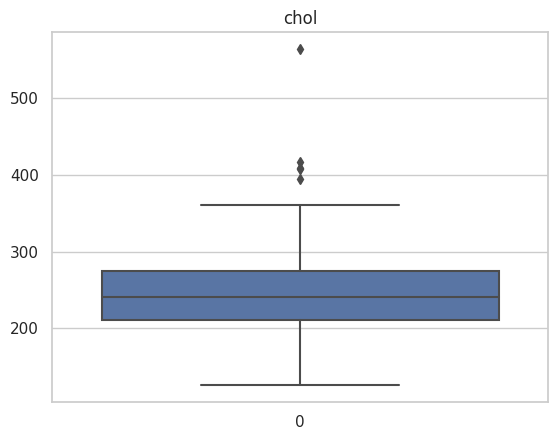

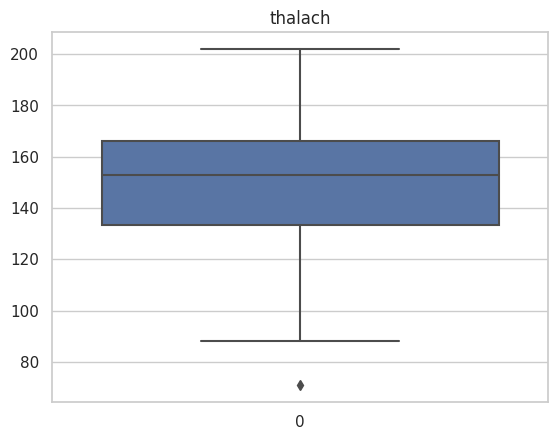

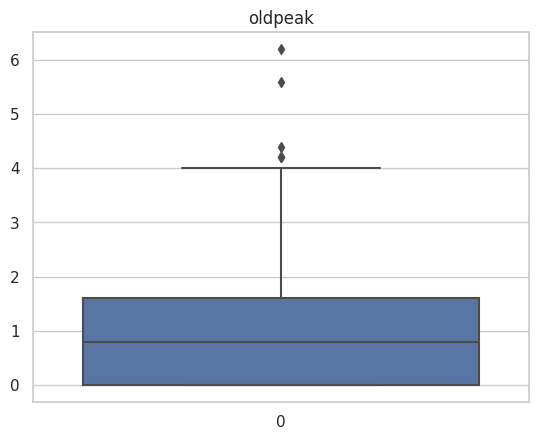

In [ ]:
#Boxplot for outlier detection
sns.set(style="whitegrid")
for columns in continous_features:
  sns.boxplot(data[columns])
  plt.title(columns)
  plt.show()


There are few outliers in the columns:testbps, oldpeak and cholestorl.

Check the distrubution of the continous variables.

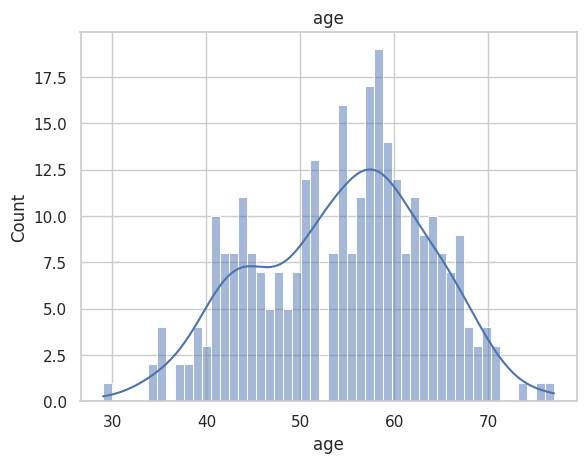

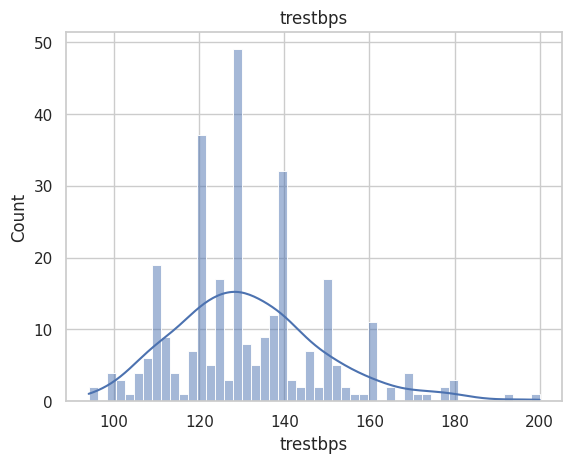

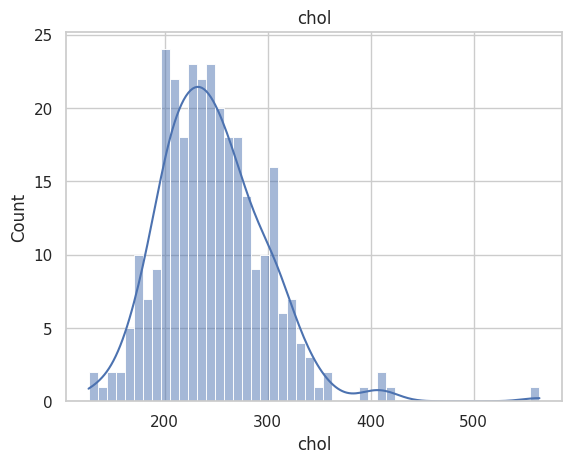

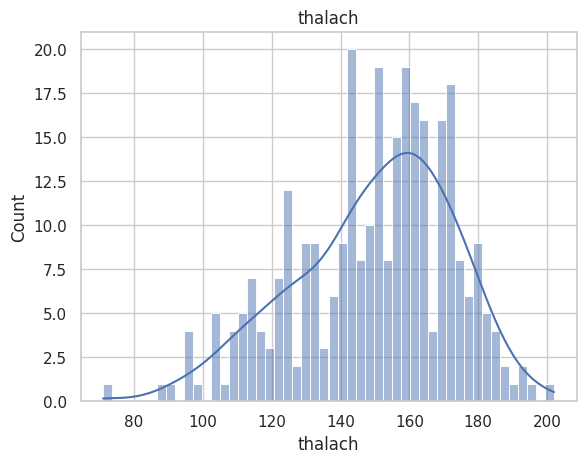

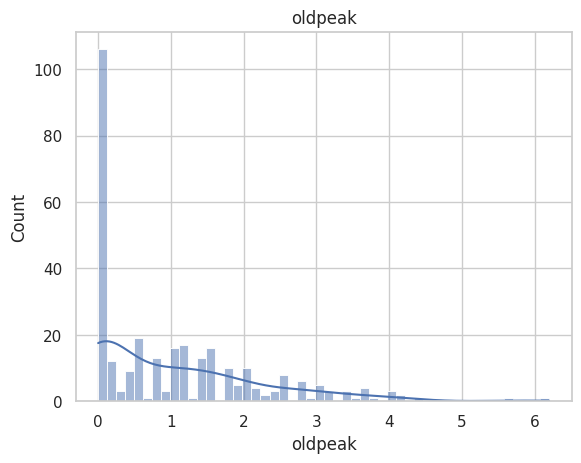

In [ ]:
for features in continous_features:
  sns.histplot(data[features],bins=50,kde = True)
  plt.title(features)
  plt.show()

Mostly the data are standard normally distributed with some slight skewness towards right.

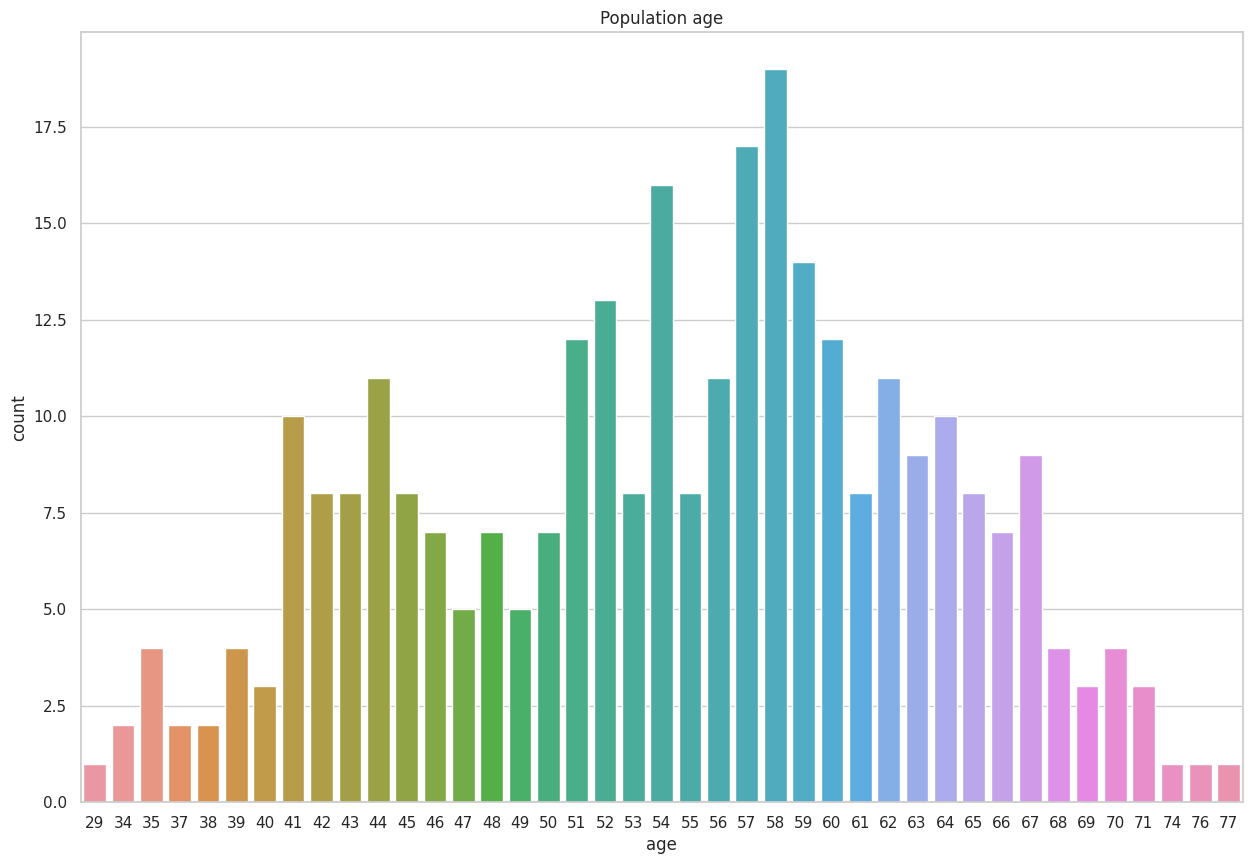

In [ ]:
# Analysing the age column
plt.figure(figsize = (15,10))
sns.countplot(data = data,x = 'age')
plt.xlabel('age')
plt.ylabel('count')
plt.title('Population age')
plt.show()

In [ ]:
# Which age group people are more prone to heart disease according to this data
# define the age groups
bins = [0,30,40,50,60,70,float('inf')]
labels = ['0-29','30-39','40-49','50-59','60-69','70+']
data['age_groups'] = pd.cut(data['age'],bins = bins, labels = labels, right = False)

In [ ]:
result = data.groupby("age_groups")["num"].mean()
result

age_groups
0-29     0.000000
30-39    0.285714
40-49    0.305556
50-59    0.480000
60-69    0.604938
70+      0.400000
Name: num, dtype: float64

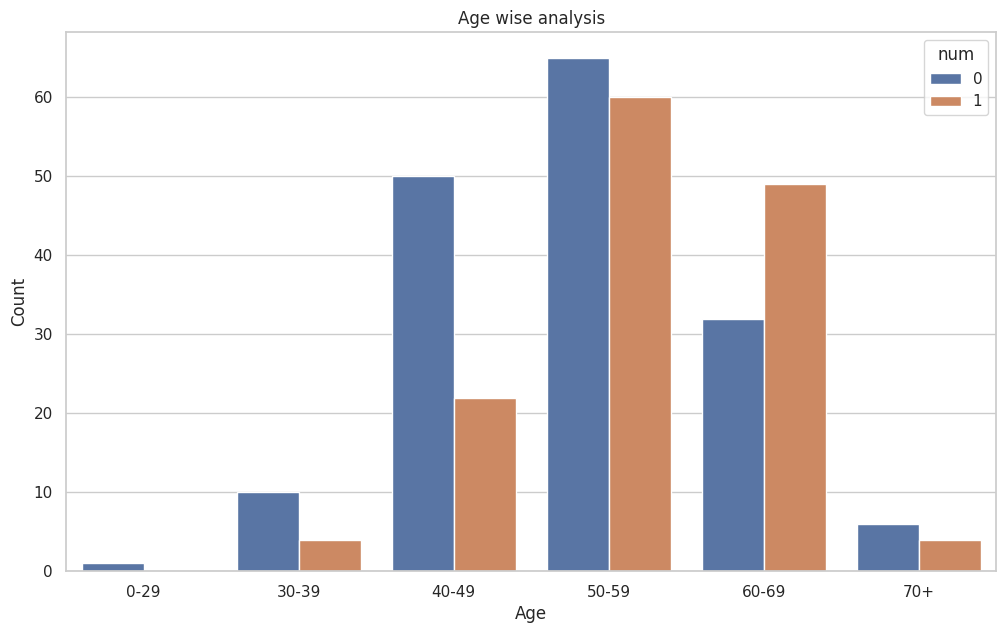

In [ ]:
plt.figure(figsize = (12,7))
sns.countplot(data = data, x = 'age_groups', hue = 'num')
plt.title('Age wise analysis')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

People belonging to the age group 50-59 and 60-69 has maximum number of cases of heart disease.

<Axes: xlabel='sex', ylabel='count'>

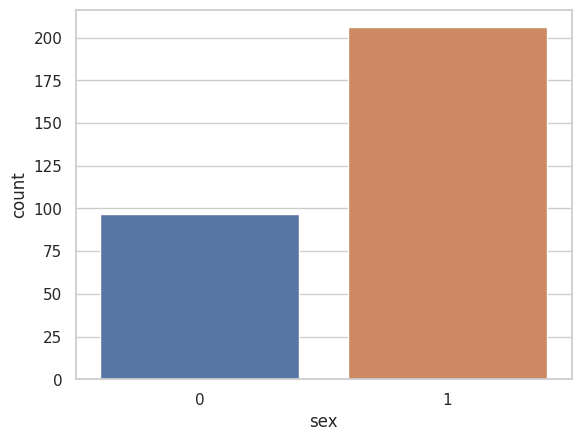

In [ ]:
# Analysing the sex column
sns.countplot(data = data, x='sex')

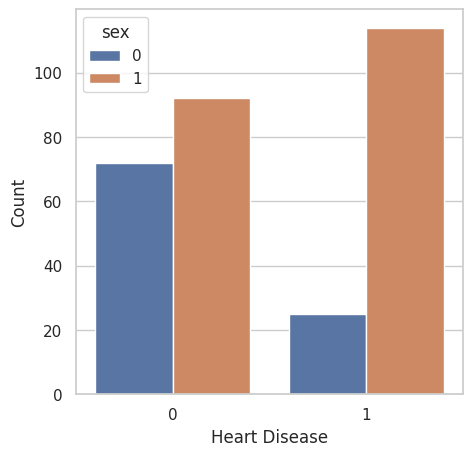

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(data = data, x = 'num',hue= 'sex')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.show()

When we compare male and female, more number of males have the heart disease.

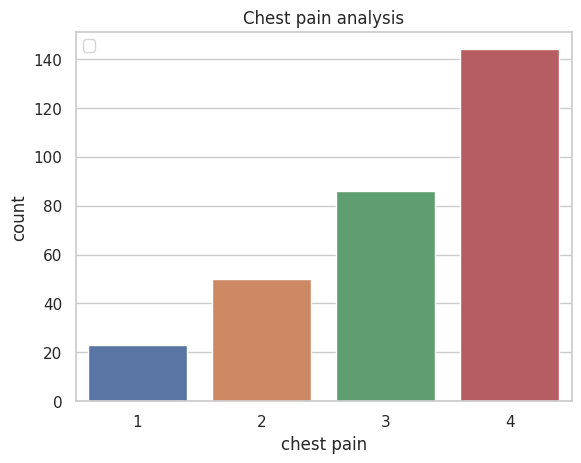

In [ ]:
#Analysing the chest pain (cp) column
sns.countplot(data = data, x = 'cp')
plt.title('Chest pain analysis')
plt.xlabel('chest pain')
plt.ylabel('count')
plt.legend()

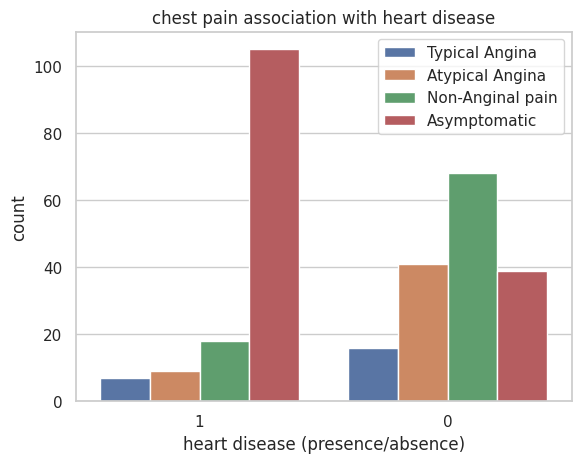

In [ ]:
#Association of chest pain with the heart disease
cp_label = ['Typical Angina','Atypical Angina','Non-Anginal pain','Asymptomatic']
sns.countplot(data = data, x = 'num', hue = 'cp', order = [1,0])
plt.xlabel('heart disease (presence/absence)')
plt.title('chest pain association with heart disease')
plt.legend(labels = cp_label)

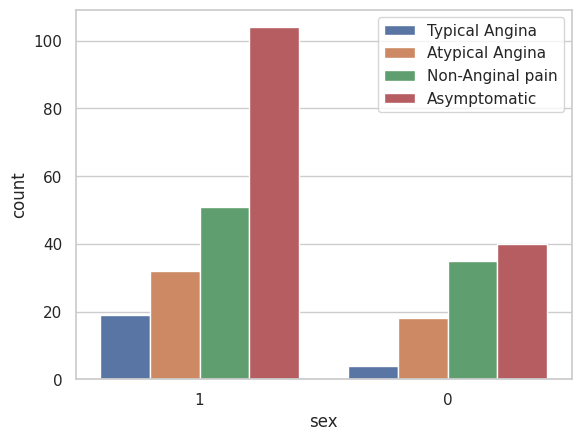

In [ ]:
# chest pain assocoation with the sex
sns.countplot(data = data, x = 'sex', hue = 'cp', order = [1,0])
plt.legend(labels= cp_label)

Text(0.5, 1.0, 'chest pain in different age groups')

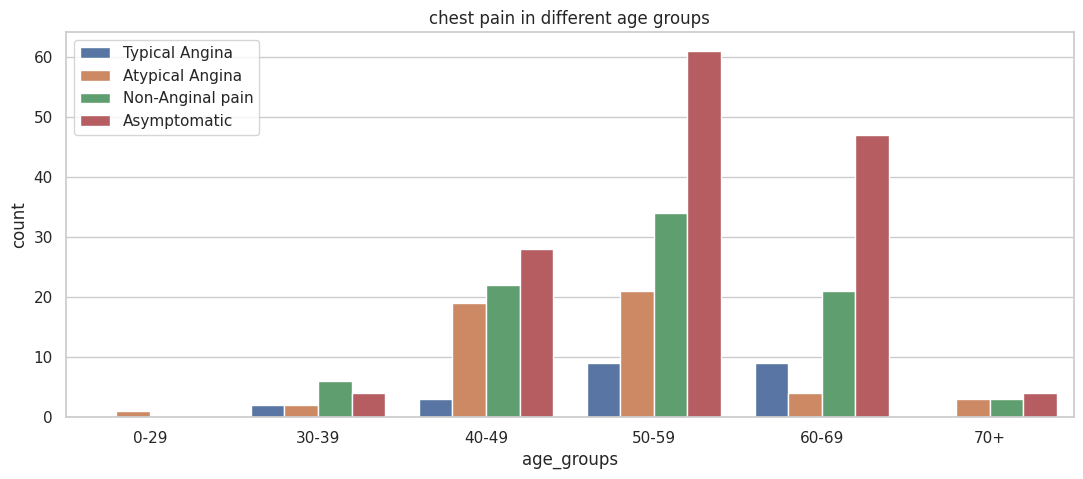

In [ ]:
# chest pain assocoation with the age
plt.figure(figsize = (13,5))
sns.countplot(data = data, x = 'age_groups', hue = 'cp')
plt.legend(labels= cp_label)
plt.title('chest pain in different age groups')

In [ ]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num', 'age_groups'],
      dtype='object')

Analyzing the blood pressure column

In [ ]:
len(data['trestbps'].unique())

50

Text(0.5, 1.0, 'blood pressure v/s heart disease')

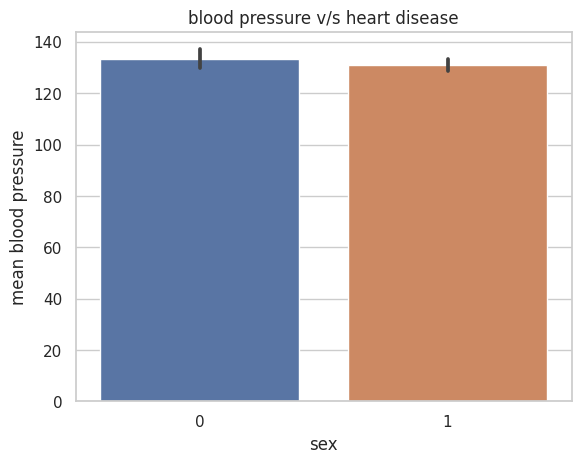

In [ ]:
sns.barplot(data = data, x = 'sex', y = 'trestbps')
plt.ylabel('mean blood pressure')
plt.xlabel('sex')
plt.title('blood pressure v/s heart disease')

Text(0.5, 1.0, 'blood pressure v/s age')

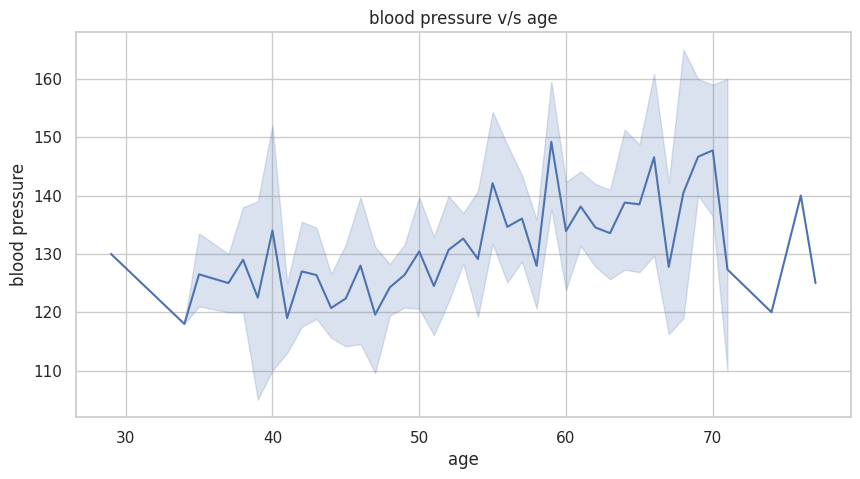

In [ ]:
plt.figure(figsize = (10,5))
sns.lineplot(data = data, x = 'age', y = 'trestbps')
plt.ylabel('blood pressure')
plt.xlabel('age')
plt.title('blood pressure v/s age')

Text(0.5, 1.0, 'comparion of blood pressure in heart disease patients')

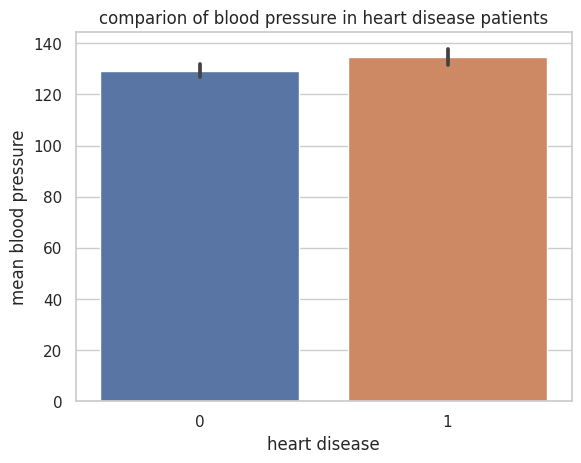

In [ ]:
sns.barplot(data = data, x = 'num', y = 'trestbps')
plt.ylabel('mean blood pressure')
plt.xlabel('heart disease')
plt.title('comparion of blood pressure in heart disease patients')

Pateints with heart disease has slighty higher blood pressure as compaired to the patients who don't have heart disease

In [ ]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num', 'age_groups'],
      dtype='object')

Analysis of cholestrol column

Text(0, 0.5, 'mean cholestrol')

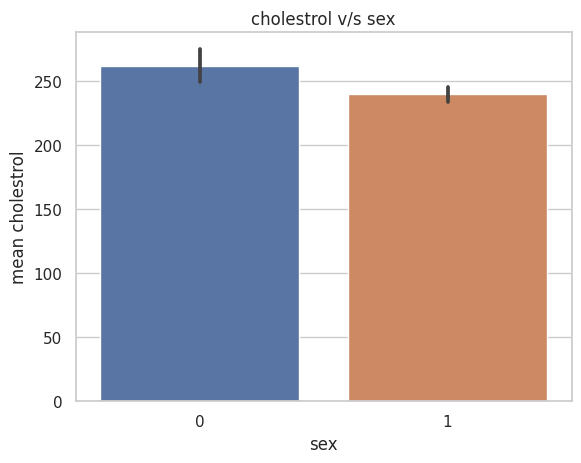

In [ ]:
sns.barplot(data = data, x = 'sex', y = 'chol')
plt.title('cholestrol v/s sex')
plt.xlabel('sex')
plt.ylabel('mean cholestrol')


Text(0.5, 1.0, 'Cholestrol V/S age')

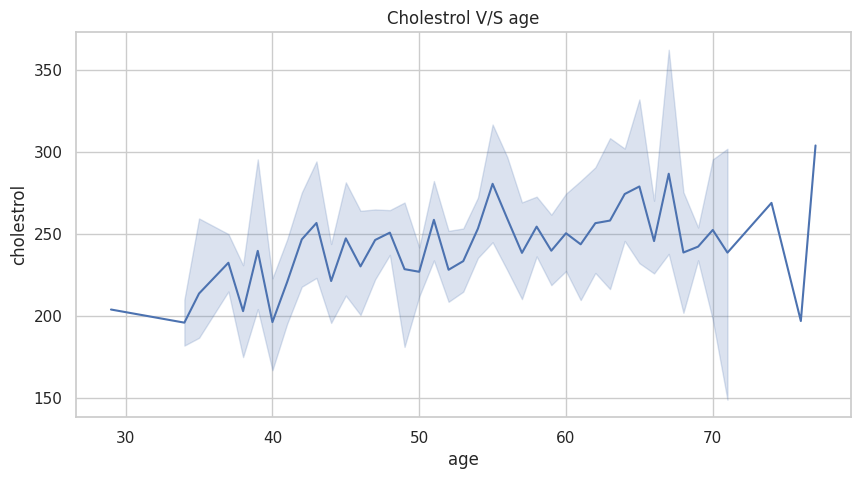

In [ ]:
plt.figure(figsize = (10,5))
sns.lineplot(data = data, x = 'age', y = 'chol')
plt.xlabel('age')
plt.ylabel('cholestrol')
plt.title('Cholestrol V/S age')

Text(0, 0.5, 'mean cholestrol')

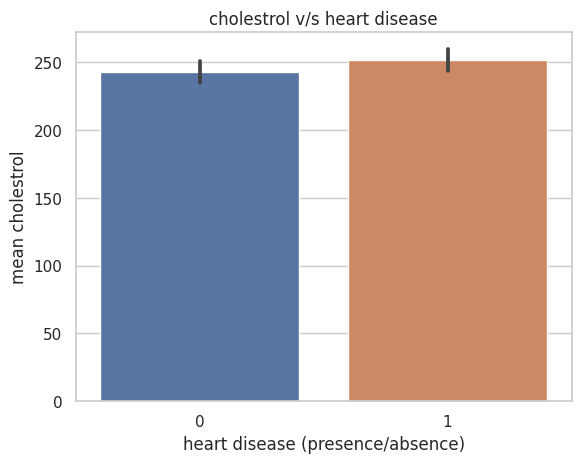

In [ ]:
sns.barplot(data = data, x = 'num', y = 'chol')
plt.title('cholestrol v/s heart disease')
plt.xlabel('heart disease (presence/absence)')
plt.ylabel('mean cholestrol')


In [ ]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num', 'age_groups'],
      dtype='object')

Analysis of fbs column

Text(0.5, 1.0, 'blood sugar level V/S sex')

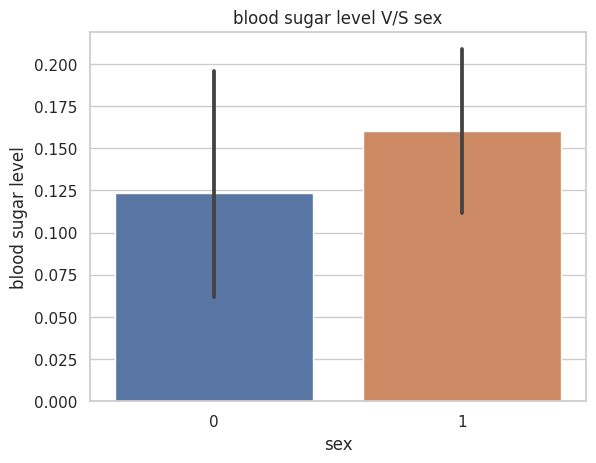

In [ ]:
sns.barplot(data = data, x = 'sex', y = 'fbs')
plt.ylabel('blood sugar level')
plt.title('blood sugar level V/S sex')


Text(0.5, 1.0, 'blood sugar level V/S age groups')

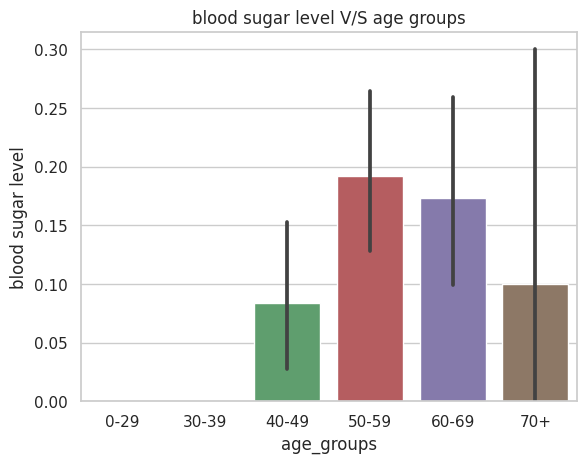

In [ ]:
sns.barplot(data = data, x = 'age_groups', y = 'fbs')
plt.ylabel('blood sugar level')
plt.title('blood sugar level V/S age groups')


Text(0.5, 0, 'heart disease (presence/absencs)')

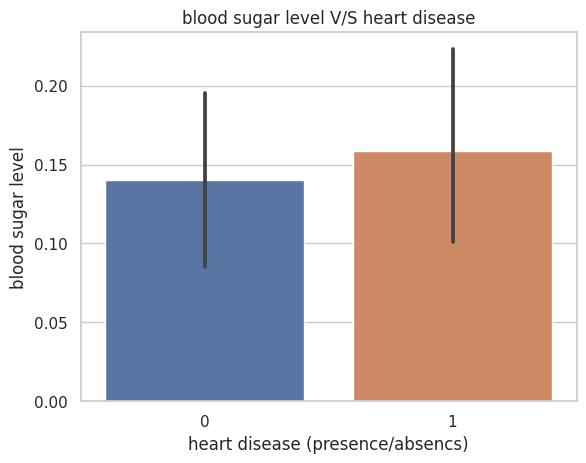

In [ ]:
#Analysis of blood sugar level with heart disease
sns.barplot(data = data, x = 'num', y = 'fbs')
plt.ylabel('blood sugar level')
plt.title('blood sugar level V/S heart disease')
plt.xlabel('heart disease (presence/absencs)')

According to the dataset pateints who has heart disease experience higher mean blood sugar level.

In [ ]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num', 'age_groups'],
      dtype='object')

Analysis of resting electricardiogram ('restecg')

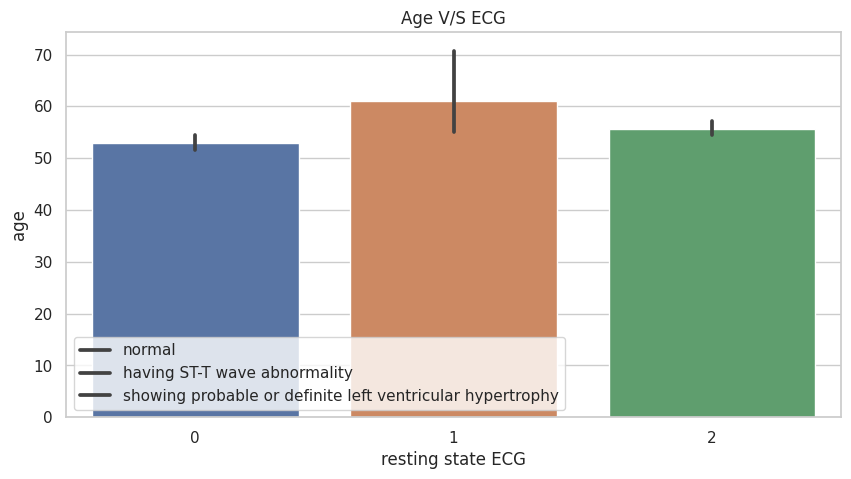

In [ ]:
#Analysis of restecg with age
plt.figure(figsize = (10,5))
sns.barplot(data = data, x = 'restecg', y = 'age')
ecg_labels = ['normal','having ST-T wave abnormality','showing probable or definite left ventricular hypertrophy']

plt.xlabel('resting state ECG')
plt.ylabel('age')
plt.title('Age V/S ECG')
plt.legend(labels= ecg_labels)

* Most people whose age is above 60 year experiance ST-T wave abnormality

Text(0.5, 1.0, 'Resting state ECG gender wise')

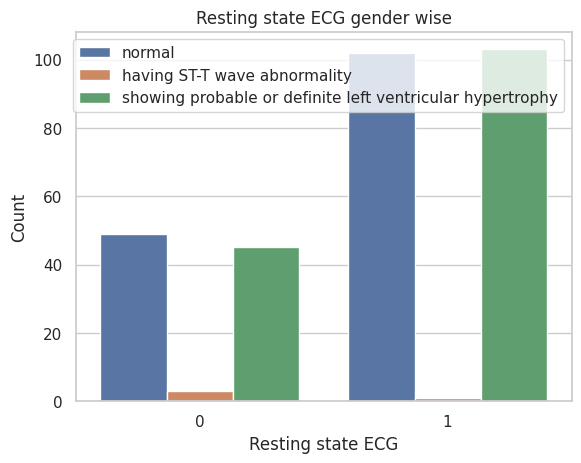

In [ ]:
sns.countplot(data = data, x = 'sex', hue = 'restecg')
plt.legend(labels= ecg_labels)
plt.xlabel('Resting state ECG')
plt.ylabel('Count')
plt.title('Resting state ECG gender wise')

* Males have relatively higher count for abnormality in their ECG

Text(0.5, 1.0, 'Resting state ECG in Heart disease')

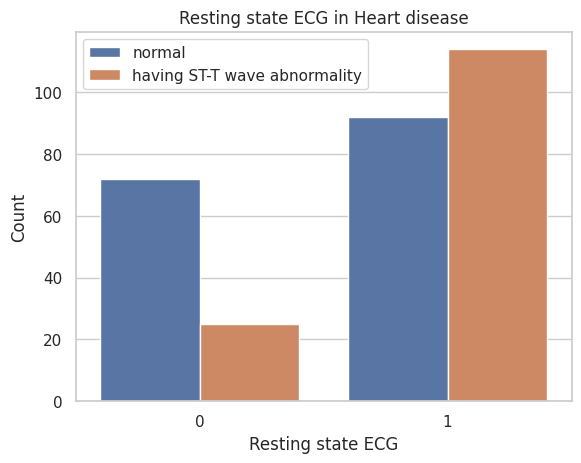

In [ ]:
sns.countplot(data = data, x = 'sex', hue = 'num')
plt.legend(labels= ecg_labels)
plt.xlabel('Resting state ECG')
plt.ylabel('Count')
plt.title('Resting state ECG in Heart disease')

* More number of cased of abnormal ST-T wave in the people with heart disease

Analysis of thalassemia column

In [ ]:
data['thal'].unique()

array([      6,       3,       7, -100000])

thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

* There is some outliers in the 'thal' column first we need to handle that

In [ ]:
#Using z-score to remove outliers from the data
z_scores = np.abs(stats.zscore(data['thal']))
threshold = 7
# Indices of outliers
outlier_indices = np.where(z_scores > threshold)
# Remove outliers
data_cleaned = data[~(z_scores > threshold)]


In [ ]:
data_cleaned.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,age_groups
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0,60-69
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1,60-69
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1,60-69
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0,30-39
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0,40-49


Text(0.5, 0, 'Heart diseased (present/absent)')

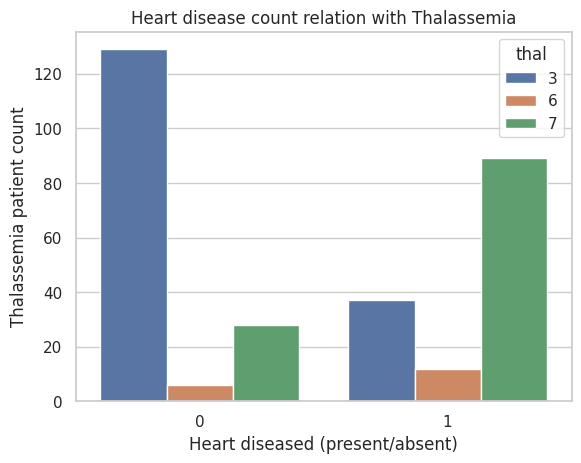

In [ ]:
#Relationship of thalassemia with the heart disease
sns.countplot(data = data_cleaned, x = 'num', hue='thal')
plt.title('Heart disease count relation with Thalassemia')
plt.ylabel('Thalassemia patient count')
plt.xlabel('Heart diseased (present/absent)')

* The most prominent defect in the people who have heart disease is reversal defect of thalassemia.

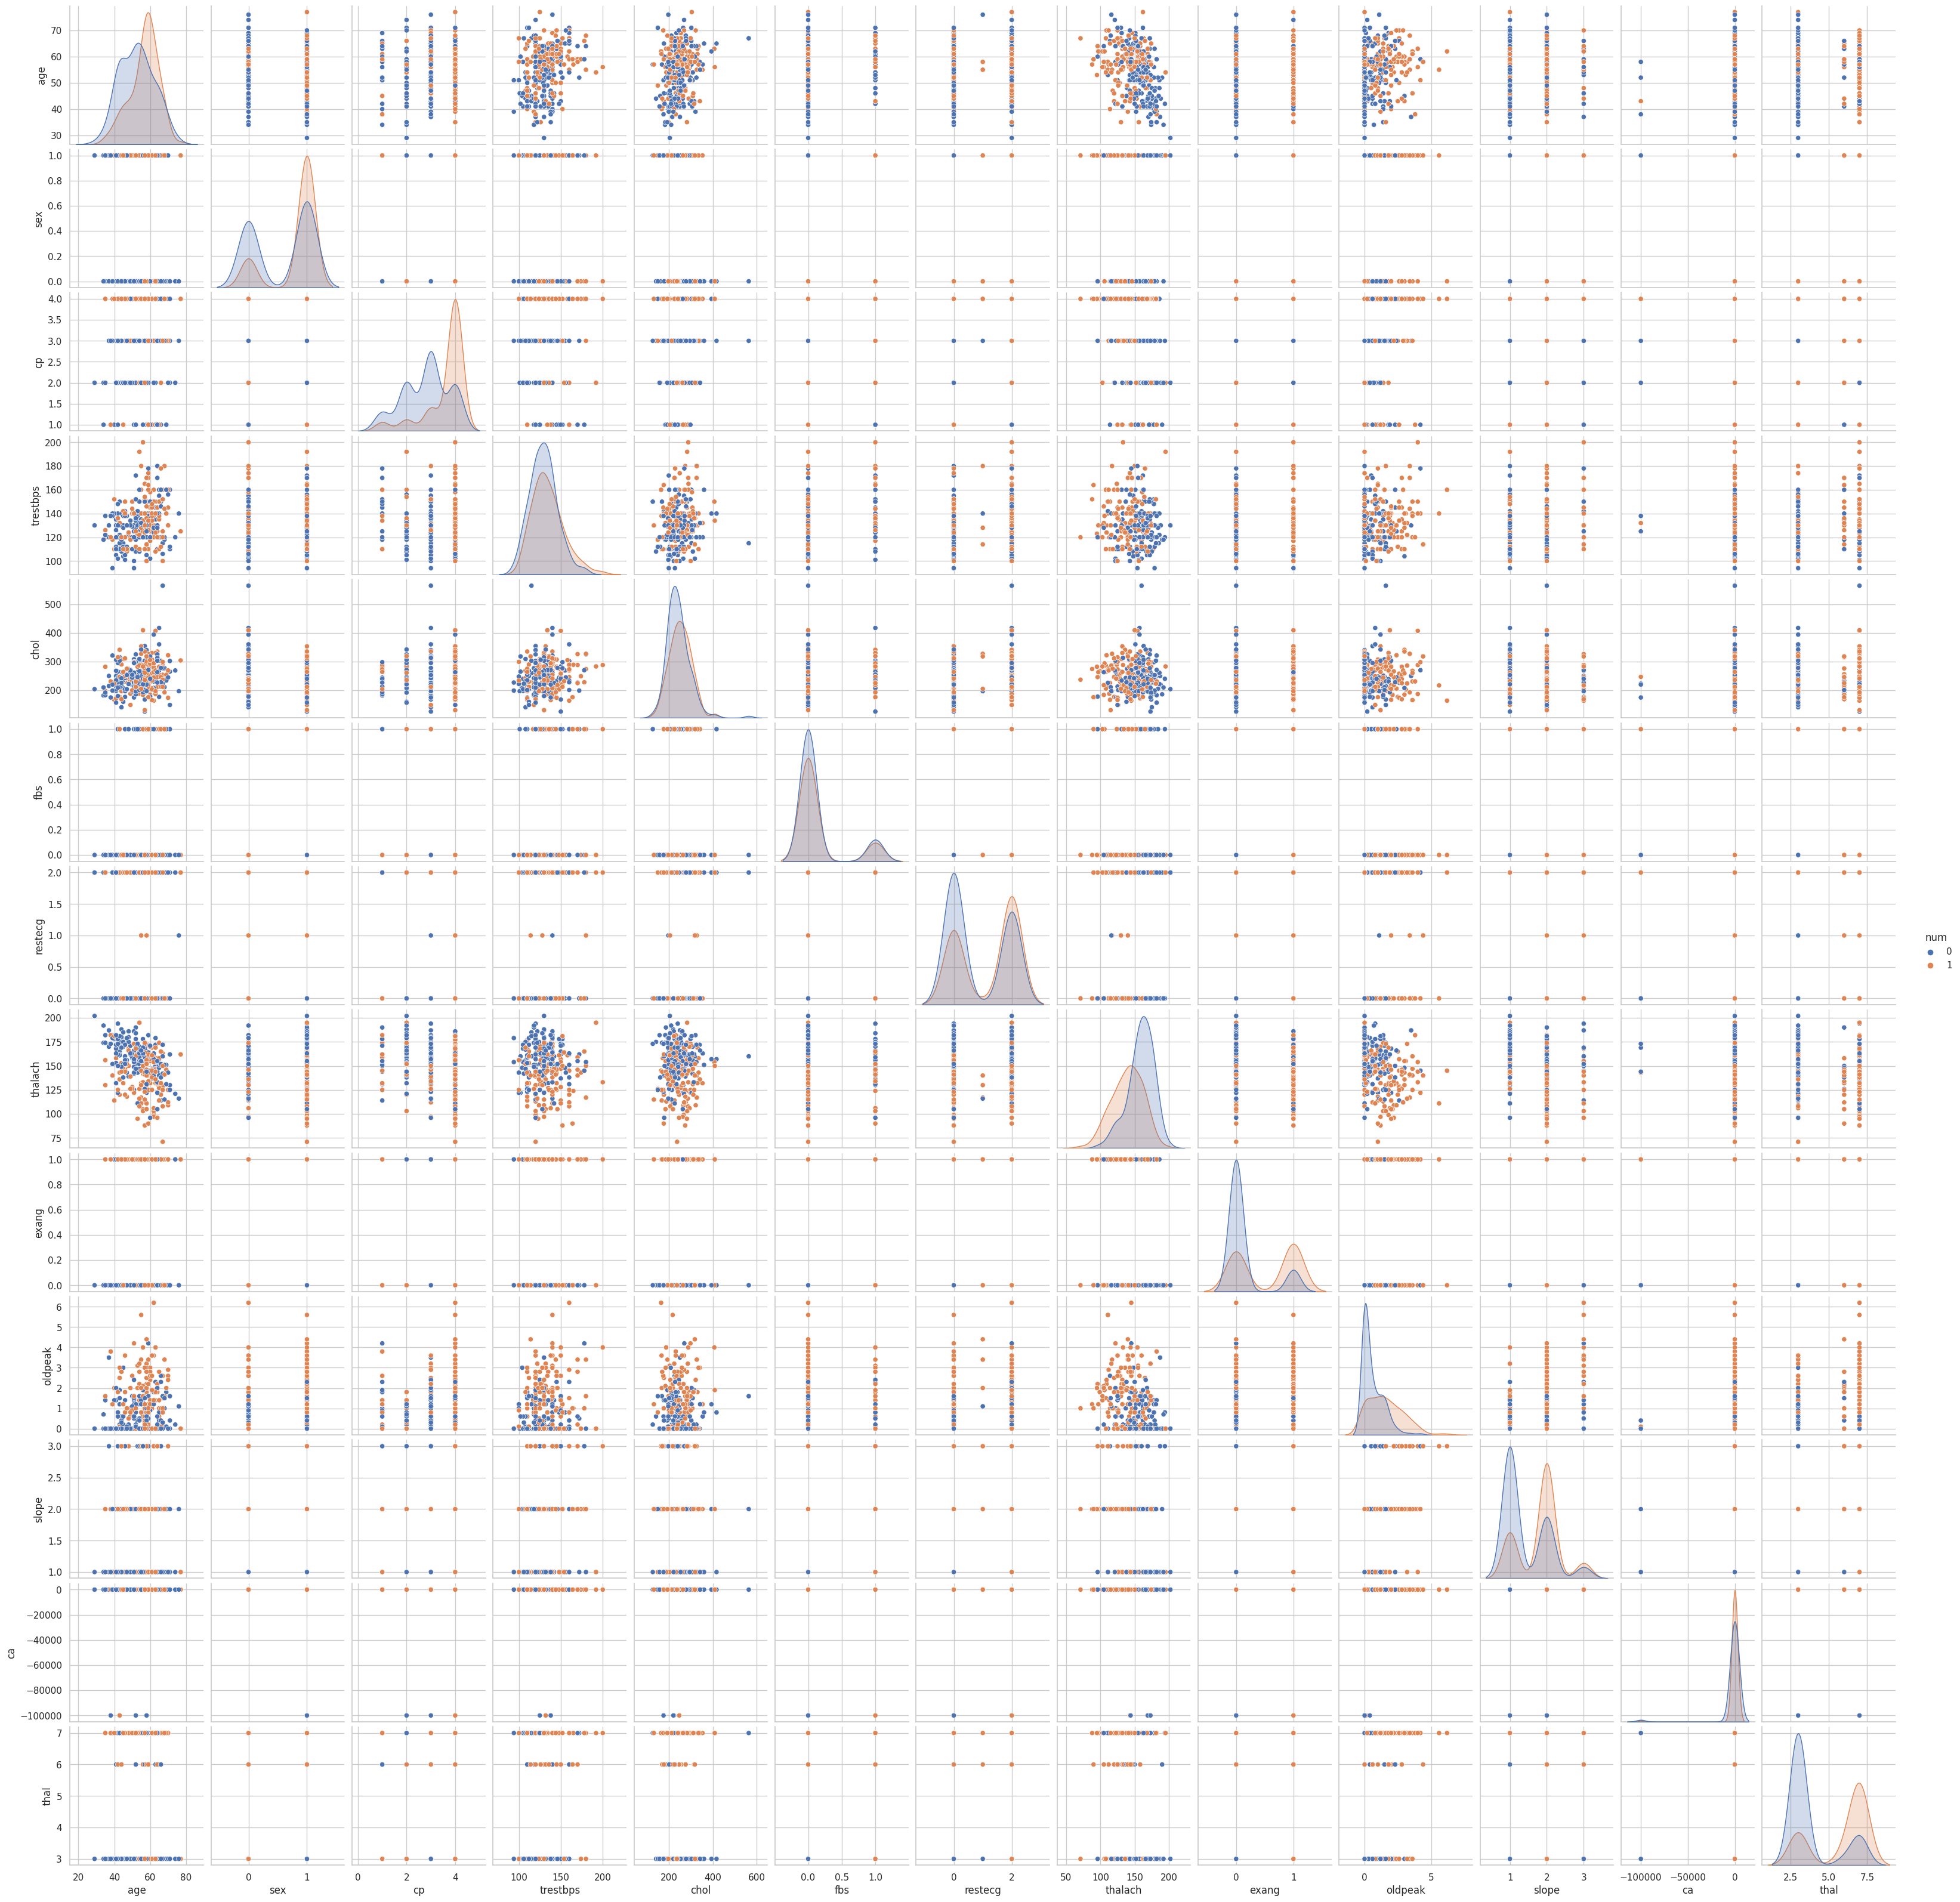

In [ ]:
sns.pairplot(data = data_cleaned, hue = 'num')

<ipython-input-52-052dd113e0fa>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_cleaned.corr(), cmap="coolwarm")


<Axes: >

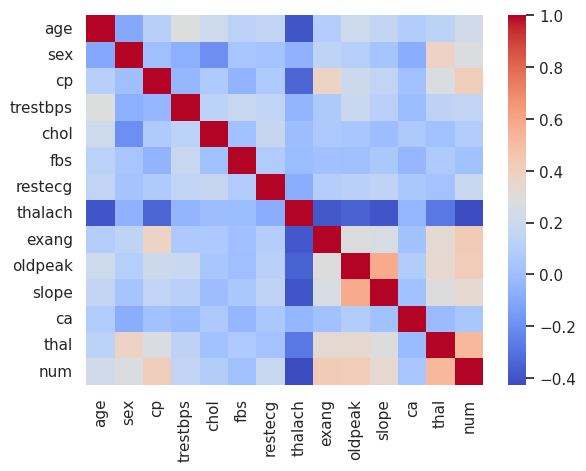

In [ ]:
sns.heatmap(data_cleaned.corr(), cmap="coolwarm")

 Correlation with heart disease more than 50% :
* Thalassemia (thal)
* Chest pain (cp)